## Đọc, hiển thi thị và lưu ảnh

### Read and display image

In [2]:
import cv2
cv2.__version__

'4.10.0'

In [37]:
iname = 'images/image.png'
img = cv2.imread(iname)

In [11]:
img.shape

(1200, 1200, 3)

In [12]:
img.size

4320000

#### Display ảnh 

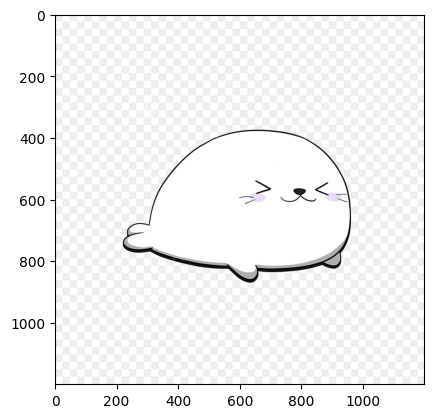

In [13]:
#to display at jupyter notebook
import matplotlib.pyplot as plt
#Note cv2 read BGR as default
plt.imshow(img)


Bởi vì cv2 mặc định đọc ảnh màu theo thứ là BGR (là blue, green và red). VÌ vậy muốn display đúng ta phài viết:

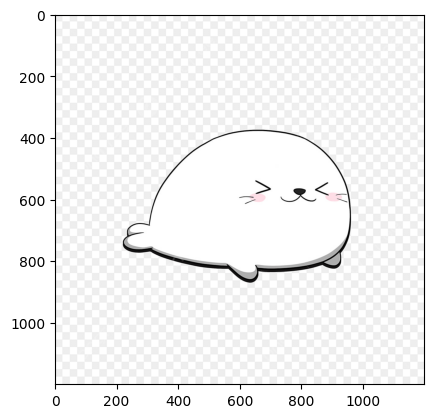

In [14]:
#display rgb image
plt.imshow(img[:,:,::-1])

### Accessing image data with numpy.array

In [15]:
img[0,0] 
#output: array([128, 138, 225], dtype=uint8)


array([238, 239, 239], dtype=uint8)

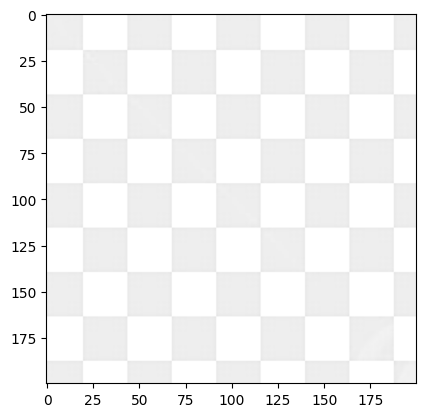

In [16]:
#crop image
crop = img[100:300, 100:300]
plt.imshow(crop[:,:,::-1])


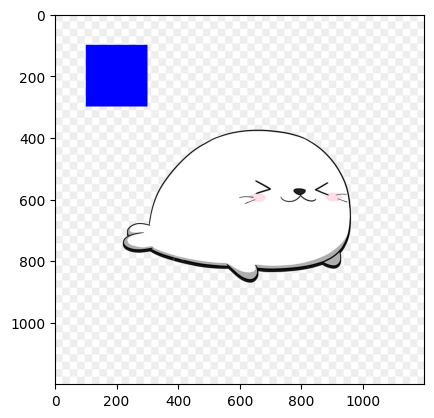

In [17]:
# Chuyển màu vùng ta vừa crop thành màu xanh:
copy = img.copy()
copy[100:300, 100:300] = [255, 0, 0] #assign blue color
plt.imshow(copy[:,:,::-1])


### Resizing images

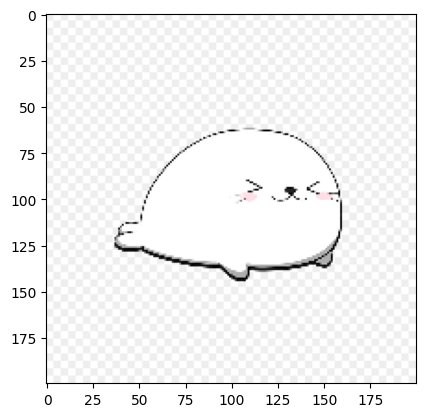

In [18]:
h, w = img.shape[:2]
resized = cv2.resize(img, (200, 200))
plt.imshow(resized[:,:,::-1])


### Write images

In [38]:
# cv2.imwrite(filename, image)
cv2.imwrite("images/test.jpg", resized)


True

# Phép toán với điểm - Điểu chỉnh độ tương phản

### Biến đổi gamma

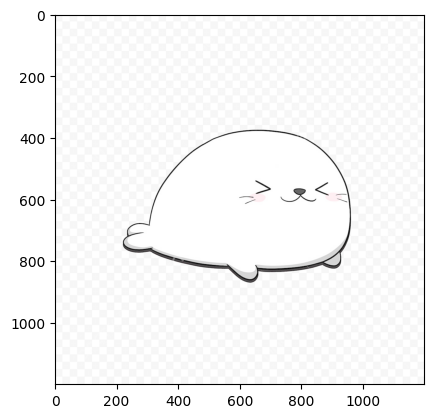

In [24]:
import numpy as np
def adjust_image_gamma(image, gamma = 1.0):
  image = np.power(image, gamma)
  max_val = np.max(image.ravel())
  image = image/max_val * 255
  image = image.astype(np.uint8)
  return image
low_adjust = adjust_image_gamma(img, 0.45)
plt.imshow(low_adjust[:,:,::-1])


143 ms ± 1.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


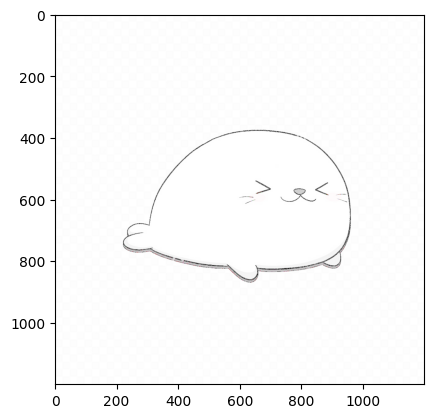

In [29]:
# what if gamma is too low?
low_adjusted = adjust_image_gamma(img, 0.1)
plt.imshow(low_adjusted[:,:,::-1])
%timeit low_adjusted = adjust_image_gamma(img, 0.1)

In [ ]:
#Sử dụng bảng chuyển look-up table (LUT) sử dụng hàm cv2.LUT()
def adjust_image_gamma_lookuptable(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    table = np.array([((i / 255.0) ** gamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")

    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)
%timeit adjust_image_gamma_lookuptable(img, 0.45)
#kq: 10 loops, best of 3: 27.6 ms per loop

1.89 ms ± 30.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


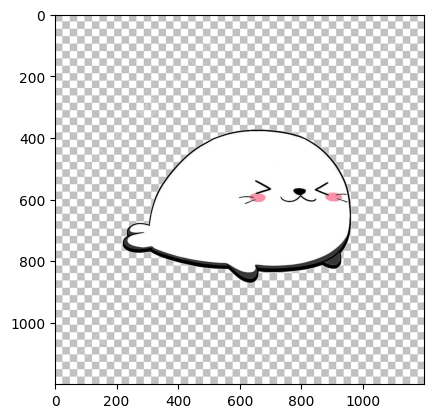

In [31]:
# 
adjusted_high = adjust_image_gamma_lookuptable(img, 4)
plt.imshow(adjusted_high[:,:,::-1])

### Correct using pixel transform

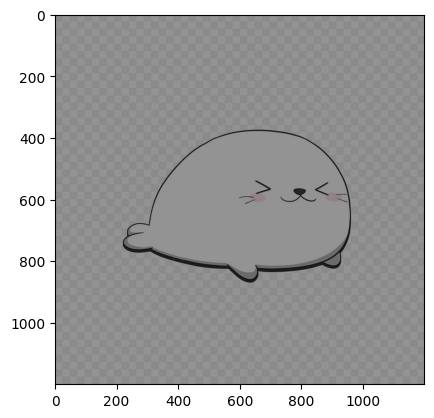

In [33]:
def pixel_transform(image, alpha = 1.0, beta = 0):
 '''
 out[pixel] = alpha * image[pixel] + beta
 '''
 output = np.zeros(image.shape, image.dtype)
 h, w, ch = image.shape
 for y in range(h):
   for x in range(w):
     for c in range(ch):
       output[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)

 return output
transformed_high = pixel_transform(img, 0.5, 20)
plt.imshow(transformed_high[:,:,::-1])



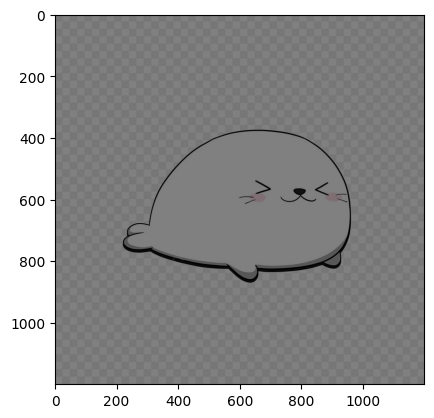

In [35]:
#anyway, a faster 
transformed_high = cv2.convertScaleAbs(img, 20, 0.5)
plt.imshow(transformed_high[:,:,::-1])


### Image negatives

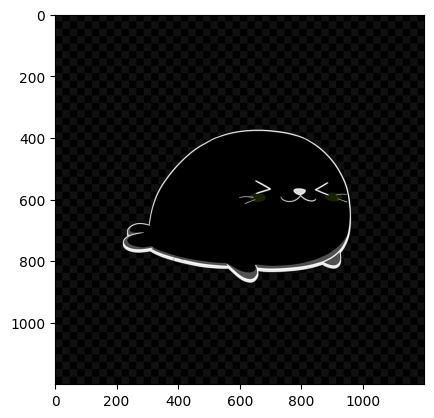

In [36]:
negation = 255 - img
plt.imshow(negation, cmap='gray')


### Combining images

#### Kết hợp các mức phơi sáng khác nhau để tạo ra hình ảnh có dải rộng cao 

In [ ]:
#Averaging to enhance contrast
hdr = np.mean(stack, axis=0)
hdr = hdr.astype(np.uint8)
plt.rcParams['figure.figsize'] = [8, 8]
plt.imshow(hdr[:,:,::-1])
